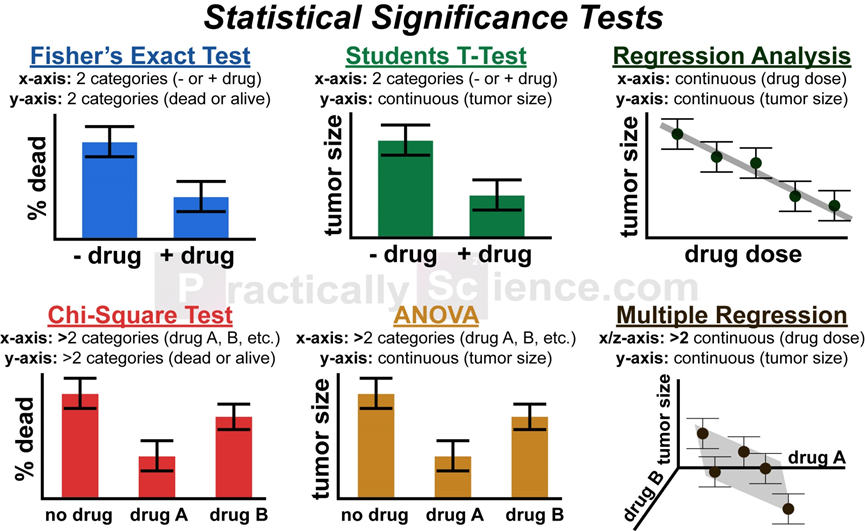


In [51]:
id=1:16
weight=sample(50:100,16)
length=sample(90:190,16)
sex=sample(c("male","femal"),16,replace=T)
ethnicity=sample(c("asian","african americain","indian"),16,replace=T)
tumor_size=runif(16,1,3)
drug=sample(c('drug A','drug B'),16,replace=T)
live=sample(c('live','dead'),16,replace=T)
data=data.frame(id,weight,length,sex,ethnicity,tumor_size,drug,live)
head(data)
tail(data)


id,weight,length,sex,ethnicity,tumor_size,drug,live
1,92,98,male,asian,1.894923,drug A,dead
2,96,141,male,asian,2.826799,drug A,dead
3,81,187,femal,african americain,1.138259,drug B,dead
4,77,173,femal,african americain,2.483131,drug B,dead
5,84,148,femal,indian,2.970231,drug B,dead
6,71,115,femal,indian,2.147356,drug B,dead


,id,weight,length,sex,ethnicity,tumor_size,drug,live
11,11,91,114,male,indian,2.590121,drug A,dead
12,12,57,174,male,asian,1.889929,drug B,dead
13,13,72,145,male,asian,2.202560,drug B,dead
14,14,53,138,femal,asian,1.804203,drug B,dead
15,15,78,186,femal,indian,1.444005,drug B,live
16,16,61,176,male,indian,1.190538,drug B,dead


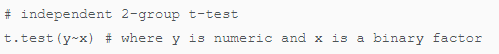

In [52]:
t.test(data$tumor_size ~ data$sex)


	Welch Two Sample t-test

data:  data$tumor_size by data$sex
t = 0.42436, df = 13.998, p-value = 0.6778
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5024575  0.7503214
sample estimates:
mean in group femal  mean in group male 
           2.071726            1.947795 


In [18]:
library(ggplot2)

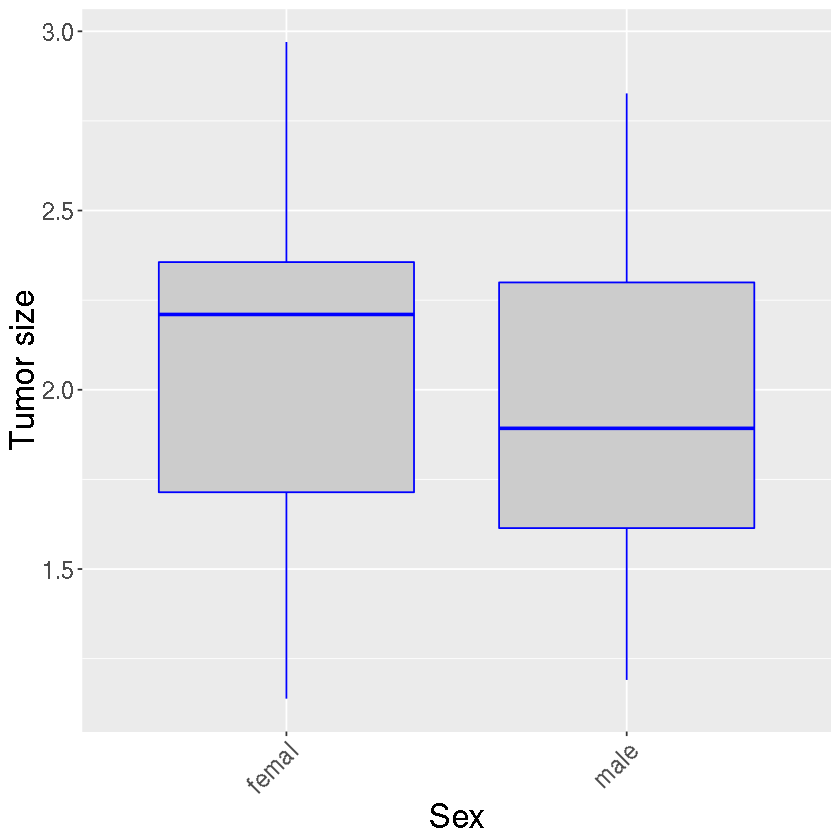

In [53]:
ggplot(data, aes(x = sex, y = tumor_size)) +
  geom_boxplot(fill = "grey80", colour = "blue") +
  scale_x_discrete() + xlab("Sex") +
  ylab("Tumor size")+theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1)) 

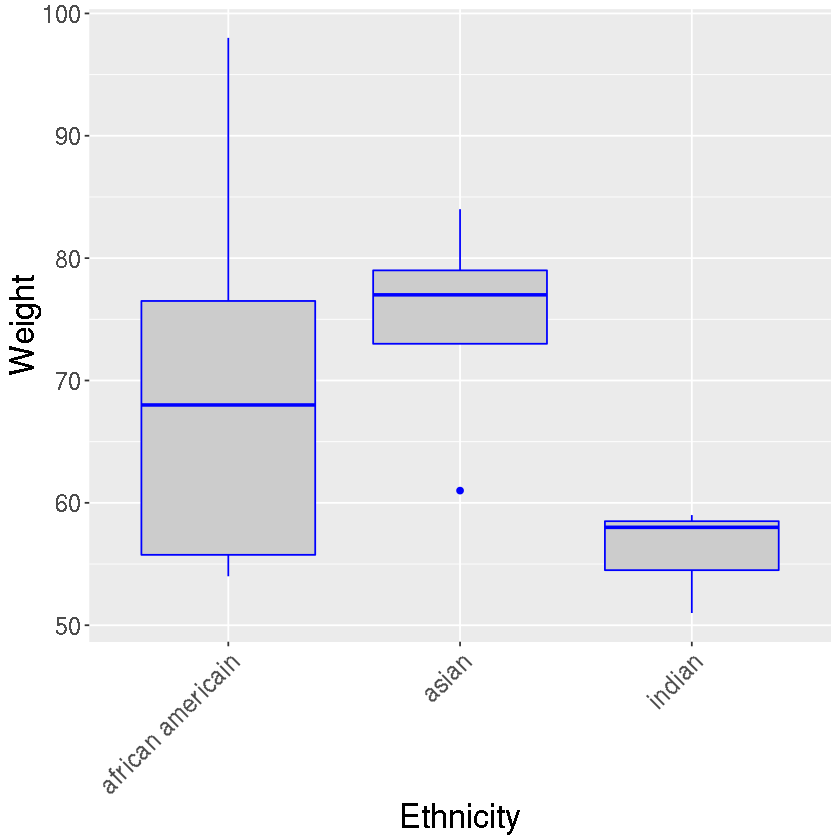

In [25]:
ggplot(data, aes(x = ethnicity, y = weight)) +
  geom_boxplot(fill = "grey80", colour = "blue") +
  scale_x_discrete() + xlab("Ethnicity") +
  ylab("Weight")+theme(text = element_text(size=20),
        axis.text.x = element_text(angle=45, hjust=1)) 

In [54]:
# 1- method 1
mod = lm(tumor_size ~ ethnicity, data = data)
#summary(mod)
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ethnicity,2,0.2173474,0.1086737,0.305763,0.7417157
Residuals,13,4.6204344,0.3554180,NA,NA


In [55]:
# 2- method 2
res.aov <- aov(tumor_size ~ ethnicity, data = data)
summary(res.aov)


            Df Sum Sq Mean Sq F value Pr(>F)
ethnicity    2  0.217  0.1087   0.306  0.742
Residuals   13  4.620  0.3554               

In [56]:
pairwise.t.test(data$tumor_size, data$ethnicity,
                 p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  data$tumor_size and data$ethnicity 

       african americain asian
asian  0.77              -    
indian 0.77              0.77 

P value adjustment method: BH 

In [ ]:
#Check ANOVA assumptions: test validity?
http://www.sthda.com/english/wiki/one-way-anova-test-in-r#what-is-one-way-anova-test

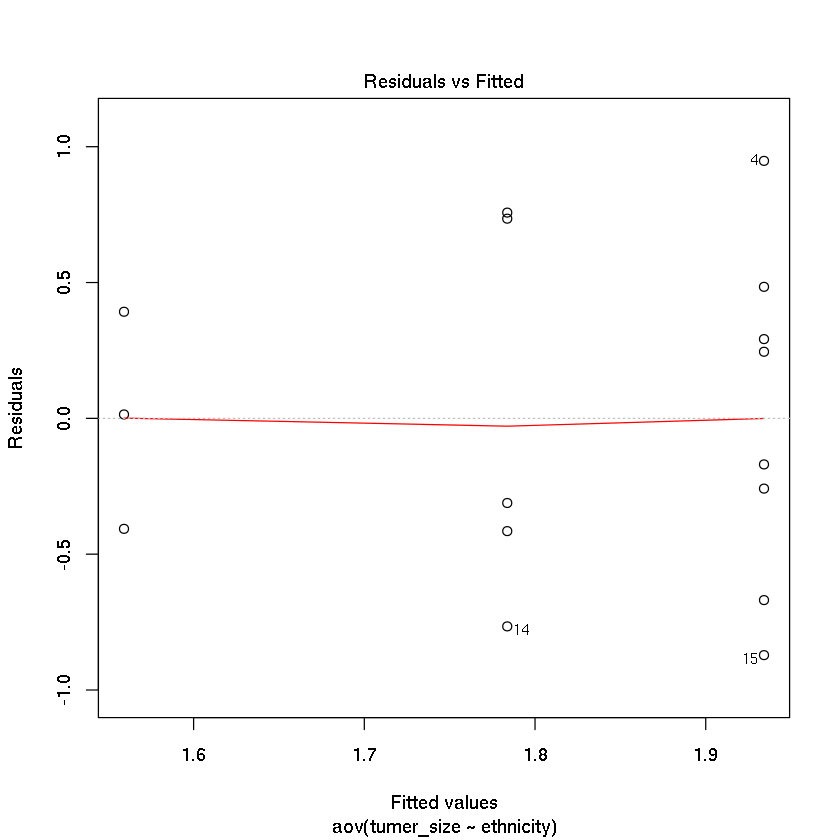

In [40]:
plot(res.aov, 1)

In [42]:
head(data)

id,weight,lenght,sex,ethnicity,tumer_size,drug,live
1,51,132,male,indian,1.573557,drug A,live
2,58,135,male,indian,1.152493,drug A,dead
3,84,161,femal,asian,2.541156,drug B,live
4,54,184,femal,african americain,2.881964,drug A,dead
5,81,119,male,african americain,1.675484,drug B,dead
6,98,188,male,african americain,1.764543,drug B,live


In [44]:
# linear regression
fit1 <- lm(weight ~ lenght, data = data)
summary(fit1)



Call:
lm(formula = weight ~ lenght, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.336 -15.746  -1.301  14.340  24.785 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 84.67525   21.82607   3.880  0.00167 **
lenght      -0.07008    0.14467  -0.484  0.63560   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.3 on 14 degrees of freedom
Multiple R-squared:  0.01648,	Adjusted R-squared:  -0.05377 
F-statistic: 0.2346 on 1 and 14 DF,  p-value: 0.6356


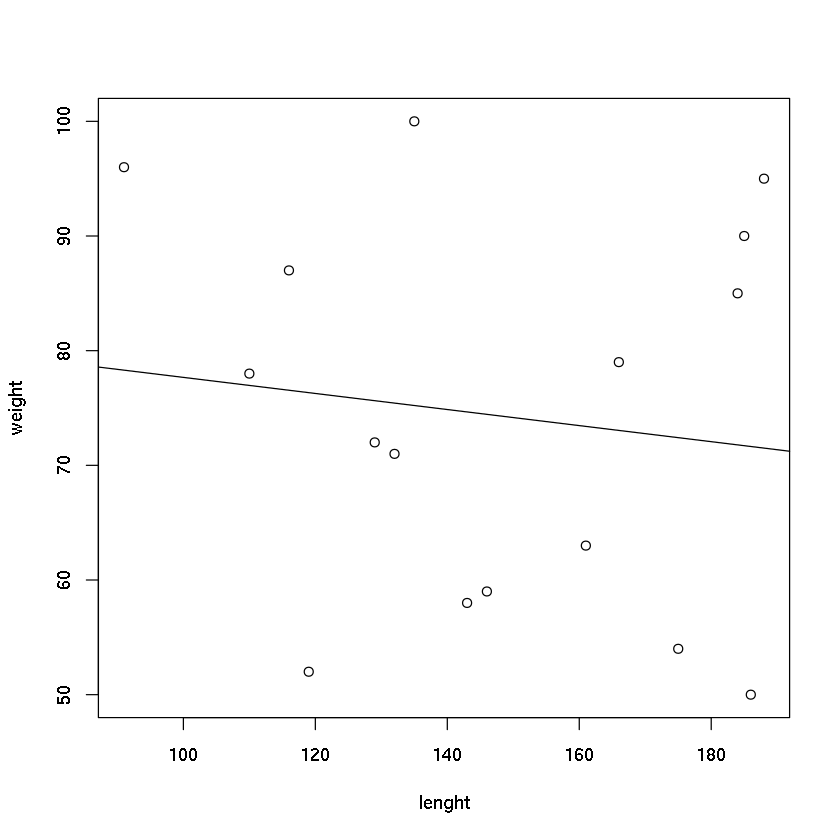

In [46]:
plot(weight ~ lenght, data = data)
abline(fit1)


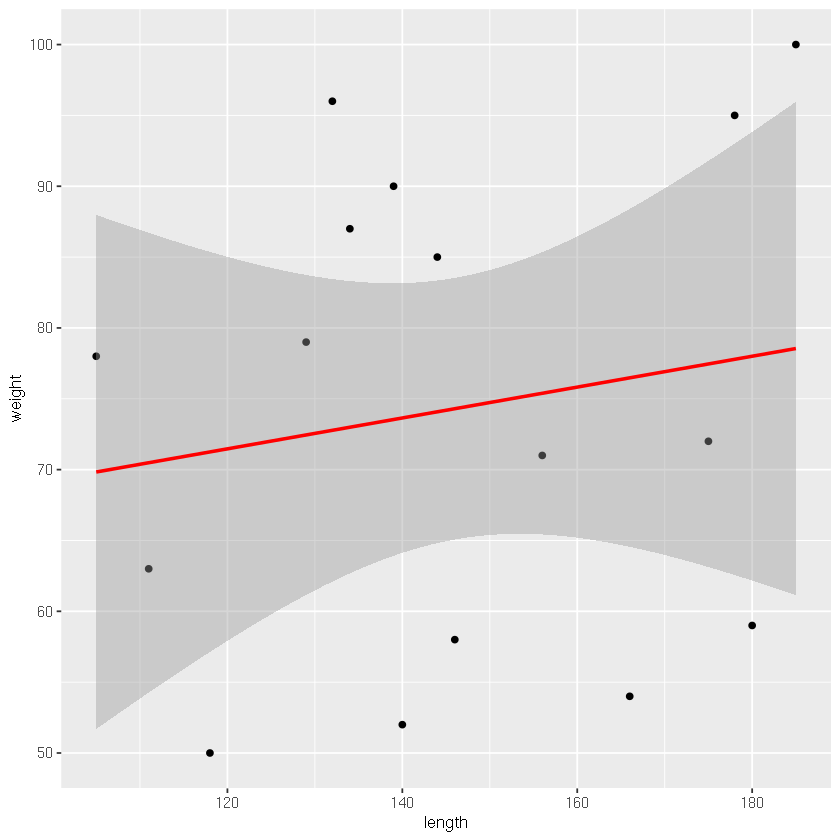

In [48]:
library(ggplot2)

ggplot(data, aes(x = length, y = weight)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [57]:
# Multiple Linear Regression Example 
fit <- lm(tumor_size ~ drug + sex + ethnicity, data=data)
summary(fit) # show results


Call:
lm(formula = tumor_size ~ drug + sex + ethnicity, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61113 -0.42363 -0.02213  0.40087  0.91843 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.3055     0.4373   5.272 0.000263 ***
drugdrug B       -0.5561     0.3373  -1.649 0.127426    
sexmale          -0.4483     0.3386  -1.324 0.212298    
ethnicityasian    0.5105     0.4421   1.155 0.272716    
ethnicityindian   0.3024     0.3870   0.781 0.451083    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5692 on 11 degrees of freedom
Multiple R-squared:  0.2633,	Adjusted R-squared:  -0.004616 
F-statistic: 0.9828 on 4 and 11 DF,  p-value: 0.456


In [58]:
table(data$drug,data$live)

        
         dead live
  drug A    3    2
  drug B    8    3

In [59]:
fisher.test(table(data$drug,data$live))


	Fisher's Exact Test for Count Data

data:  table(data$drug, data$live)
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.03906287 10.33939883
sample estimates:
odds ratio 
  0.584096 
